In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas_profiling as prof

In [29]:
df_tdf = pd.read_csv('TDF.csv',parse_dates=['Date'])
df_pazzo = pd.read_csv('PAZZO.csv',parse_dates=['Date'])
df_tdf['Cut_units'] = df_tdf['Purchase Order Units']-df_tdf['Fulfilled Units']

In [30]:
df_comb = pd.merge(df_tdf,df_pazzo,how='left',on =['Date','SKU'])

In [31]:
df_comb.head()

,DC,Date,SKU,Purchase Order Units,Fulfilled Units,Cut_units,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week
0,DC East,2017-10-02,SKU001,10,10,0,519,0.020876,17.913664,0.076624,67,52,47,41
1,DC East,2017-10-09,SKU001,24,24,0,241,0.595398,13.520821,0.171255,49,45,42,36
2,DC East,2017-10-16,SKU001,0,0,0,559,0.000000,15.839939,0.088271,95,94,89,84
3,DC East,2017-10-23,SKU001,0,0,0,424,0.000000,13.128688,0.141562,79,80,79,71
4,DC East,2017-10-30,SKU001,3,3,0,488,0.041484,16.277441,-0.164290,49,81,76,78


In [32]:
temp = df_comb.groupby(by=['SKU','Date']).sum()['Purchase Order Units'].reset_index()
temp =temp.rename(columns ={'Purchase Order Units':'Total_POU'})
df_comb = pd.merge(df_comb,temp,how='left',on=['SKU','Date'])

In [33]:
df_comb.head()

,DC,Date,SKU,Purchase Order Units,Fulfilled Units,Cut_units,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week,Total_POU
0,DC East,2017-10-02,SKU001,10,10,0,519,0.020876,17.913664,0.076624,67,52,47,41,27
1,DC East,2017-10-09,SKU001,24,24,0,241,0.595398,13.520821,0.171255,49,45,42,36,24
2,DC East,2017-10-16,SKU001,0,0,0,559,0.000000,15.839939,0.088271,95,94,89,84,1
3,DC East,2017-10-23,SKU001,0,0,0,424,0.000000,13.128688,0.141562,79,80,79,71,45
4,DC East,2017-10-30,SKU001,3,3,0,488,0.041484,16.277441,-0.164290,49,81,76,78,63


In [34]:
df_comb['SKU_no'] =df_comb['SKU'].apply(lambda x: x[4:])

In [35]:
df_comb['percent_POU_bydc'] = df_comb['Purchase Order Units']*100/df_comb['Total_POU']

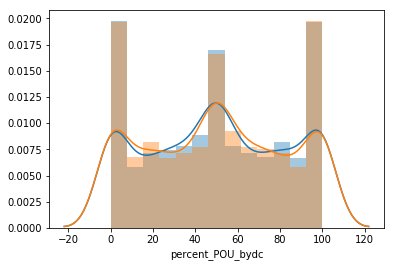

In [44]:
sns.distplot(df_comb['percent_POU_bydc'][df_comb['DC']=='DC East'].dropna())
sns.distplot(df_comb['percent_POU_bydc'][df_comb['DC']=='DC West'].dropna())

In [47]:
#df_comb[(df_comb['DC']=='DC West')].groupby(by ='SKU').mean()['percent_POU_bydc']
#df_comb[(df_comb['DC']=='DC East')].groupby(by ='SKU').mean()['percent_POU_bydc']


Since both percentage order are same that means, Pazzo is ordering quantity cyclical from one distribution center to another

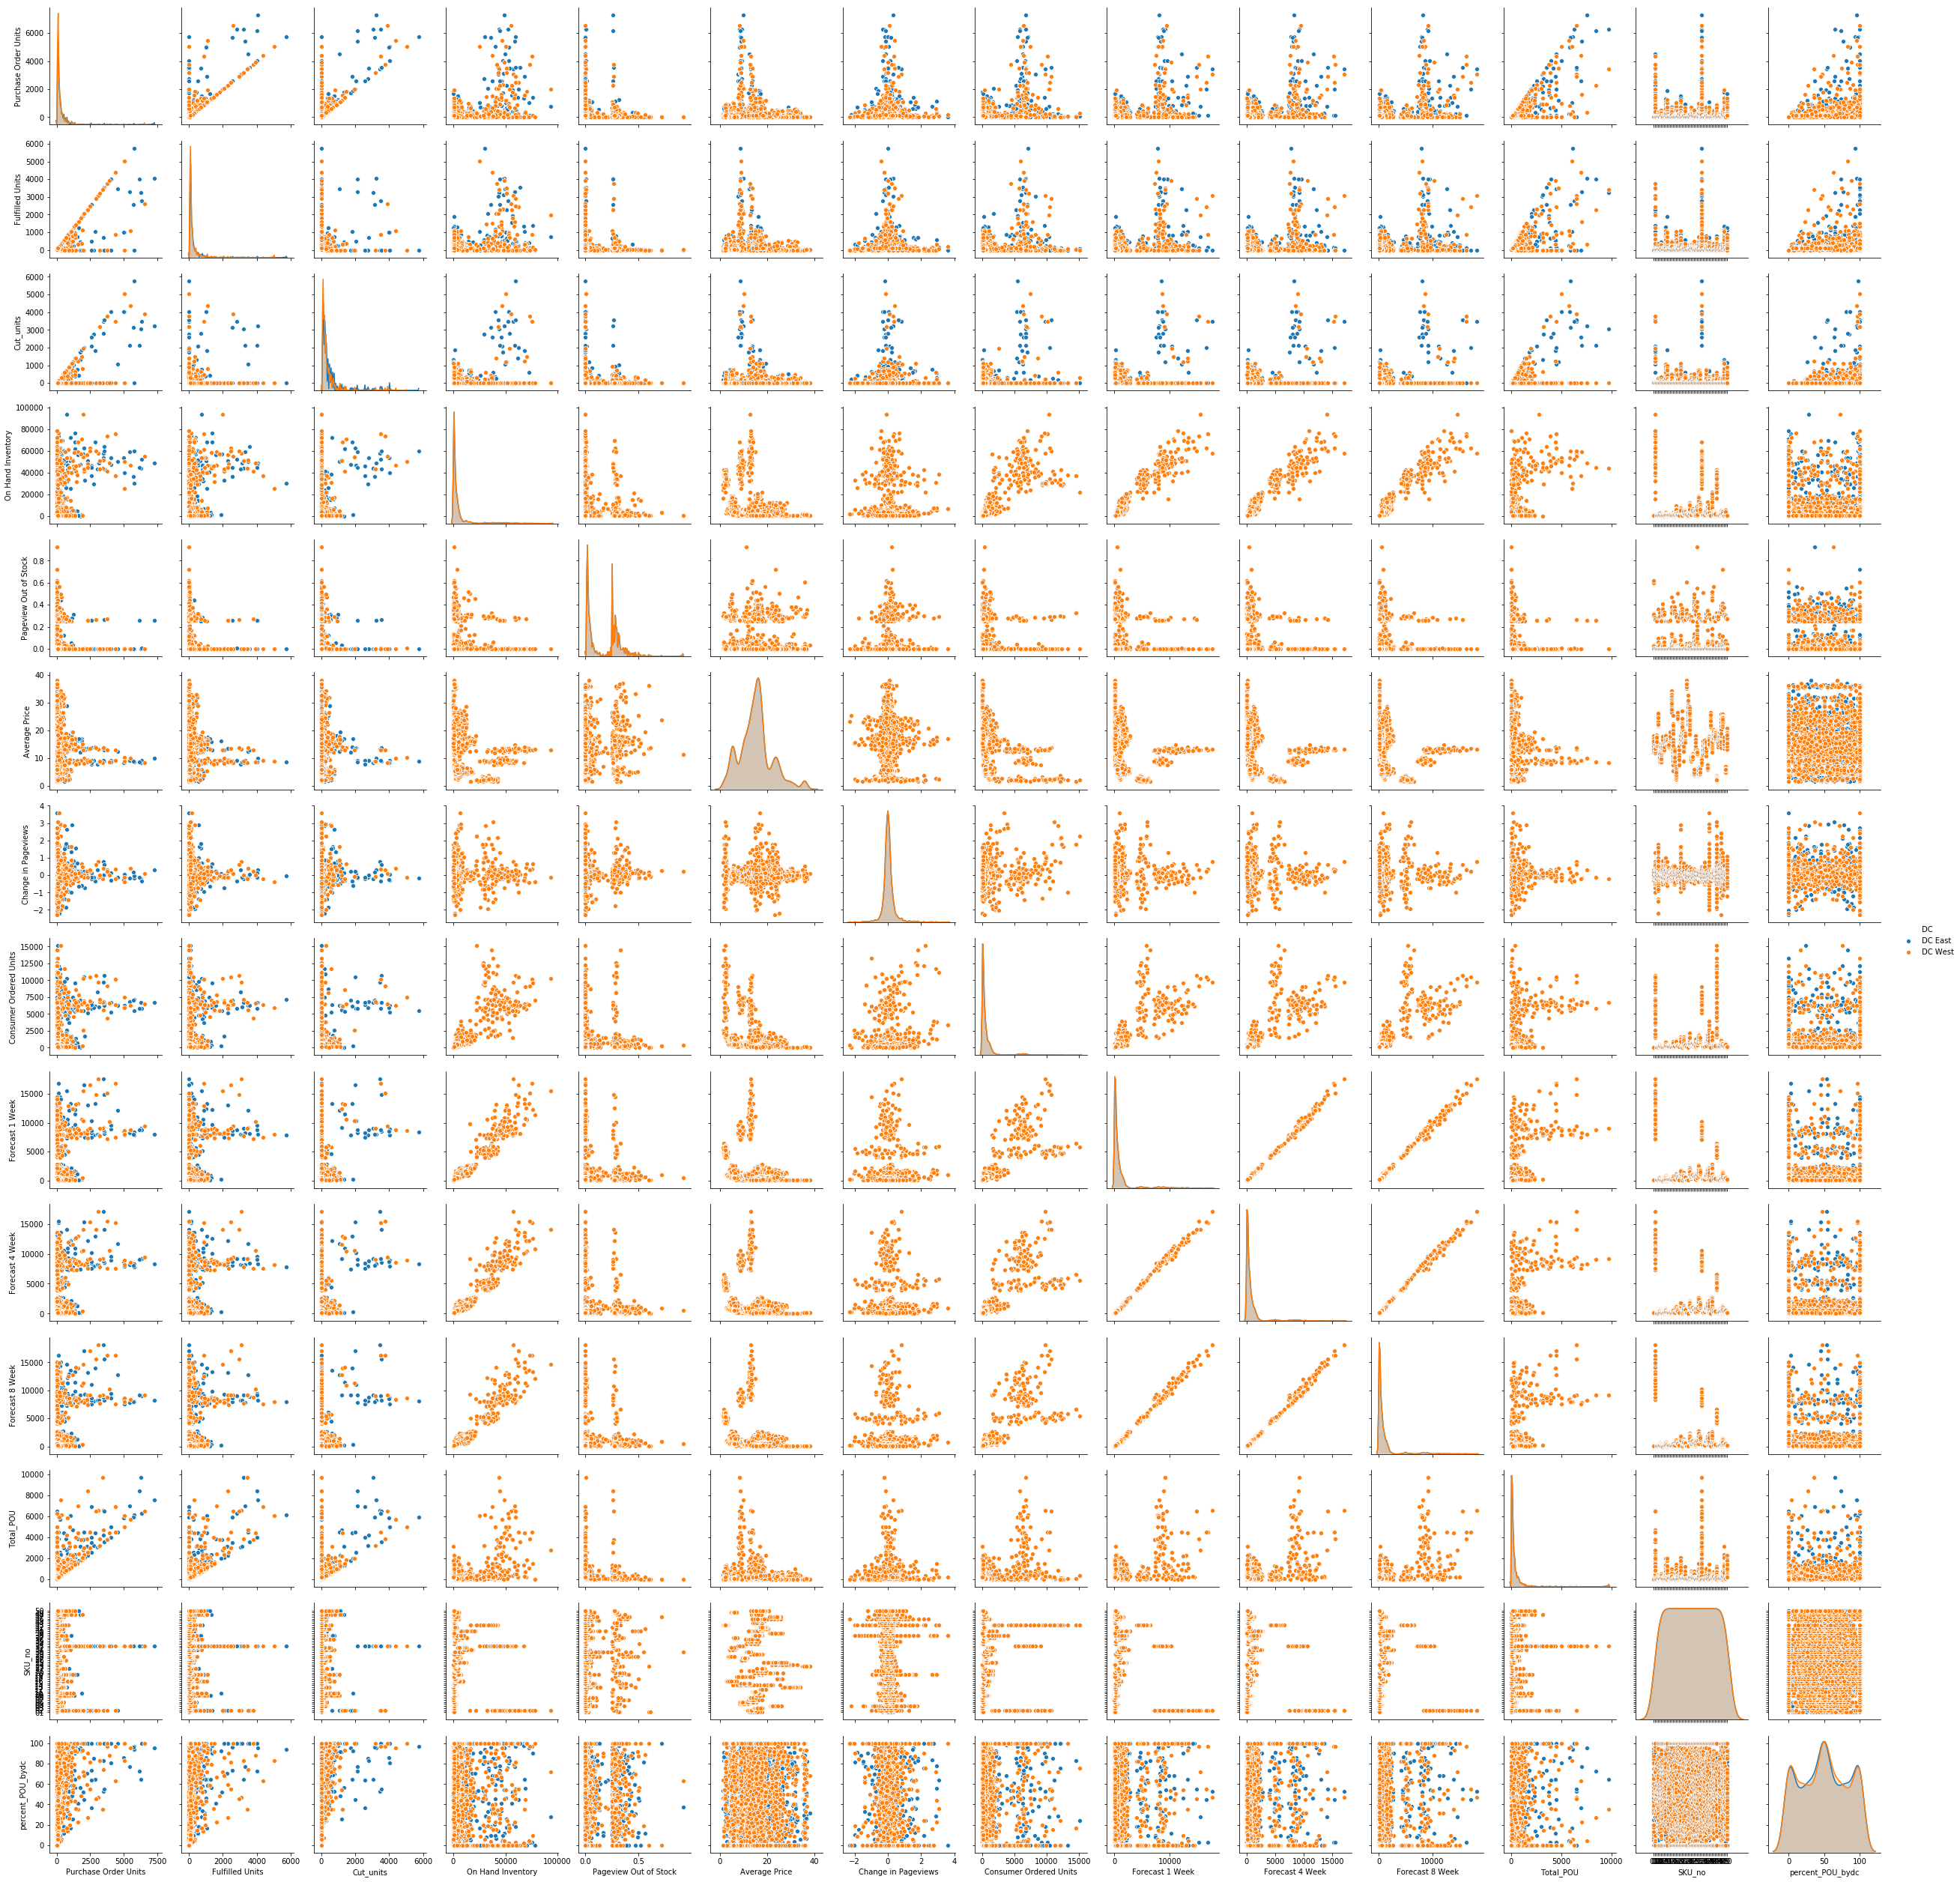

In [36]:

sns.pairplot(df_comb,hue='DC')


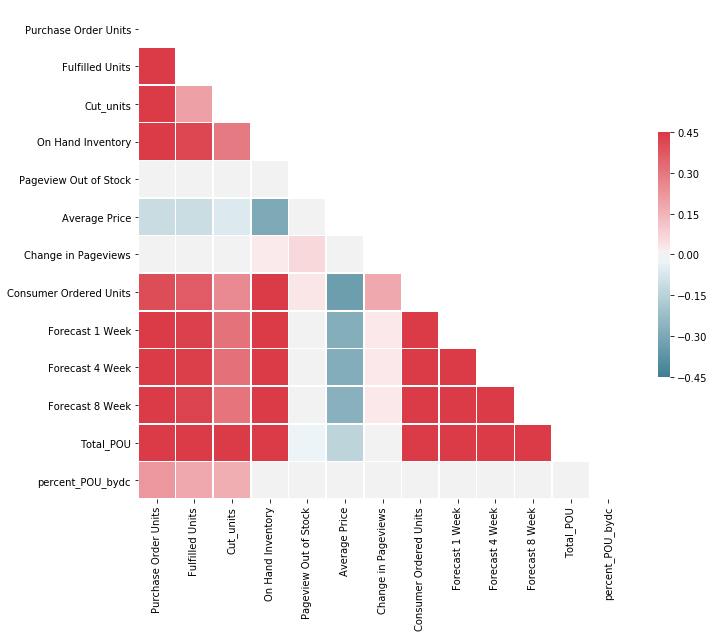

In [41]:
# Compute the correlation matrix
corr = df_comb.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-0.45, vmax=.45, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
# Effect of time on pageviews and Consumer ordered units

In [39]:
corr

,Purchase Order Units,Fulfilled Units,Cut_units,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week,Total_POU,percent_POU_bydc
Purchase Order Units,1.000000,0.797827,0.749578,4.625220e-01,-1.730979e-02,-1.105309e-01,6.838243e-03,4.033869e-01,4.828923e-01,4.888289e-01,4.764975e-01,7.997670e-01,2.233298e-01
Fulfilled Units,0.797827,1.000000,0.198973,4.174287e-01,-1.234750e-02,-1.061606e-01,9.339941e-06,3.665836e-01,4.311931e-01,4.382090e-01,4.266279e-01,6.818452e-01,1.771543e-01
Cut_units,0.749578,0.198973,1.000000,2.935394e-01,-1.458096e-02,-6.311542e-02,1.110546e-02,2.532374e-01,3.115397e-01,3.134870e-01,3.061571e-01,5.514324e-01,1.683338e-01
On Hand Inventory,0.462522,0.417429,0.293539,1.000000e+00,6.978573e-03,-2.939173e-01,2.071406e-02,8.651522e-01,9.620002e-01,9.628055e-01,9.579858e-01,5.783209e-01,-1.935332e-18
Pageview Out of Stock,-0.017310,-0.012348,-0.014581,6.978573e-03,1.000000e+00,5.228059e-03,6.070776e-02,3.020454e-02,-1.232792e-03,-1.931029e-03,-1.883375e-03,-2.164354e-02,8.310019e-18
Average Price,-0.110531,-0.106161,-0.063115,-2.939173e-01,5.228059e-03,1.000000e+00,-1.681681e-02,-3.364548e-01,-2.753870e-01,-2.778844e-01,-2.693840e-01,-1.382039e-01,7.559954e-19
Change in Pageviews,0.006838,0.000009,0.011105,2.071406e-02,6.070776e-02,-1.681681e-02,1.000000e+00,1.794821e-01,2.145525e-02,2.265916e-02,2.248917e-02,8.550294e-03,1.608729e-18
Consumer Ordered Units,0.403387,0.366584,0.253237,8.651522e-01,3.020454e-02,-3.364548e-01,1.794821e-01,1.000000e+00,8.592817e-01,8.610248e-01,8.522417e-01,5.043805e-01,-4.250300e-18
Forecast 1 Week,0.482892,0.431193,0.311540,9.620002e-01,-1.232792e-03,-2.753870e-01,2.145525e-02,8.592817e-01,1.000000e+00,9.985356e-01,9.979638e-01,6.037912e-01,3.986705e-18
Forecast 4 Week,0.488829,0.438209,0.313487,9.628055e-01,-1.931029e-03,-2.778844e-01,2.265916e-02,8.610248e-01,9.985356e-01,1.000000e+00,9.979229e-01,6.112142e-01,1.070809e-17
